In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import netCDF4
import xarray as xr
import hmp
from pathlib import Path
from mne.io import read_info
from mne import read_epochs
from hmpai.data import StageFinder
import os
DATA_PATH = Path(os.getenv("DATA_PATH"))

In [2]:
# info_path = DATA_PATH / "sat2/preprocessed_500hz/preprocessed_S1_raw.fif"
info_path = DATA_PATH / "sat2/preprocessed_500hz/S1_epo.fif"
# info_path = DATA_PATH / "sat1/preprocessed/processed_0001_epo.fif"
positions = read_info(info_path)

epoch = read_epochs(info_path)
epoch.set_montage("biosemi64")
positions = epoch.info

Reading /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif ...
    Found the data of interest:
        t =    -300.00 ...    4000.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
2376 matching events found
No baseline correction applied
0 projection items activated


#### Task 1

In [3]:
cpus = 4

epoched_data_path = DATA_PATH / "prp/VP_all_t1_250_off50.nc"

# TODO: Conditions + labels
conditions = ["short", "long"]
labels = {"short": ["negative", "t1_1", "t1_2", "t1_3", "t1_4"], "long": ["negative", "t1_1", "t1_2", "t1_3", "t1_4"]}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit",  # n_events is extracted from the amount of labels in 'conditions' variable
    verbose=False,
    condition_variable="condition",
    condition_method="equal",
    # fits_to_load=["250hz_t1_short.nc", "250hz_t1_long"],
    n_comp=10,
    event_width=40,
)
# Retraining model with smaller window
stage_finder.fit_model()

Transforming epoched data to principal component (PC) space
Fitting HMP model for short condition


  0%|          | 0/158 [00:00<?, ?it/s]

Transition event 1 found around sample 12
Transition event 2 found around sample 50
Transition event 3 found around sample 118
Transition event 4 found around sample 144

All events found, refitting final combination.
Estimating 4 events model
parameters estimated for 4 events model
Fitting HMP model for long condition


  0%|          | 0/154 [00:00<?, ?it/s]

Transition event 1 found around sample 12
Transition event 2 found around sample 50
Transition event 3 found around sample 109
Transition event 4 found around sample 139

All events found, refitting final combination.
Estimating 4 events model
parameters estimated for 4 events model


(<Figure size 1200x300 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='Time (in ms)'>], dtype=object))

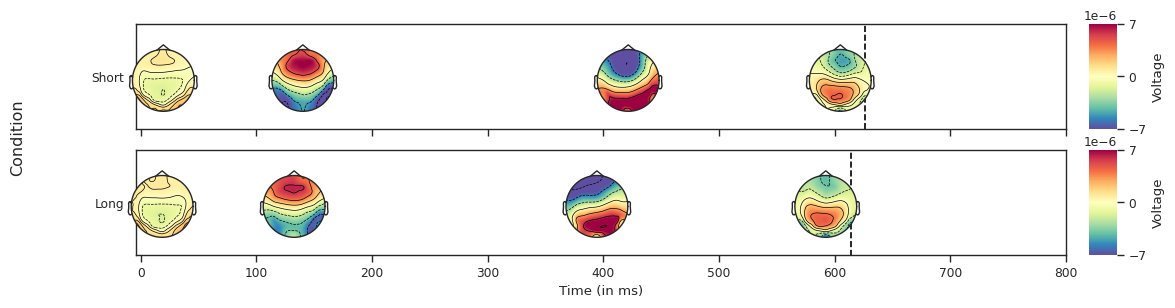

In [4]:
stage_finder.visualize_model(positions, max_time=800)

In [5]:
hmp.utils.save_fit(stage_finder.fits[0], "250hz_t1_short.nc")
hmp.utils.save_fit(stage_finder.fits[1], "250hz_t1_long.nc")

250hz_t1_short.nc saved
250hz_t1_long.nc saved


In [ ]:
output_path = DATA_PATH / "prp/stage_data_250hz_t1.nc"
stage_data = stage_finder.label_model(
    label_fn=stage_finder.__label_model_probabilistic__, probabilistic=True
)

In [5]:
stage_data.to_netcdf(output_path)

#### Task 2

In [ ]:
cpus = 4

epoched_data_path = DATA_PATH / "prp/VP_all_t2_250_off50.nc"

# TODO: Conditions + labels
conditions = ["short", "long"]
labels = {"short": ["negative", "t2_1", "t2_2", "t2_3"], "long": ["negative", "t2_1", "t2_2", "t2_3"]}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit",  # n_events is extracted from the amount of labels in 'conditions' variable
    verbose=False,
    condition_variable="condition",
    condition_method="equal",
    # fits_to_load=["250hz_t2_short.nc", "250hz_t2_long.nc"],
    n_comp=10,
    event_width=40,
)
# Retraining model with smaller window
stage_finder.fit_model()

In [ ]:
stage_finder.visualize_model(positions, max_time=800)

In [ ]:
hmp.utils.save_fit(stage_finder.fits[0], "250hz_t2_short.nc")
hmp.utils.save_fit(stage_finder.fits[1], "250hz_t2_long.nc")

In [ ]:
output_path = DATA_PATH / "prp/stage_data_250hz_t2.nc"
stage_data = stage_finder.label_model(
    label_fn=stage_finder.__label_model_probabilistic__, probabilistic=True
)

In [ ]:
stage_data.to_netcdf(output_path)